In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("all-signals.csv")

In [3]:
df.head()

,Index,rightLegAngleSignal,leftLegAngleSignal,yPositionOfNoseSignal,xPositionOfRHipSignal,yPositionOfRHipSignal,xPositionOfLHipSignal,yPositionOfLHipSignal,pgram
0,0,64.4400348281762,81.869898,84.0,148.0,220.0,228.0,316.0,28.472387
1,1,89.21517539700811,75.963757,84.0,228.0,316.0,228.0,316.0,0.117153
2,2,25.253163394573882,NaN,NaN,236.0,236.0,156.0,84.0,0.033466
3,3,69.14554196042165,75.963757,84.0,188.0,212.0,132.0,212.0,0.086443
4,4,nan,NaN,NaN,188.0,172.0,NaN,NaN,0.002965


In [4]:
df.columns

Index(['Index', ' rightLegAngleSignal', ' leftLegAngleSignal',
       ' yPositionOfNoseSignal', ' xPositionOfRHipSignal',
       ' yPositionOfRHipSignal', ' xPositionOfLHipSignal',
       ' yPositionOfLHipSignal', ' pgram'],
      dtype='object')

In [5]:
signal_column_names = ["rightLegAngleSignal", "leftLegAngleSignal", "yPositionOfNoseSignal", "xPositionOfRHipSignal",
                       "yPositionOfRHipSignal", "xPositionOfLHipSignal", "yPositionOfLHipSignal"]

In [6]:
# Iterate over the various columns in the dataframe and extract each one. Plot each signal in a seperate graph using 
#matplotlib after applying a simple moving average filter.

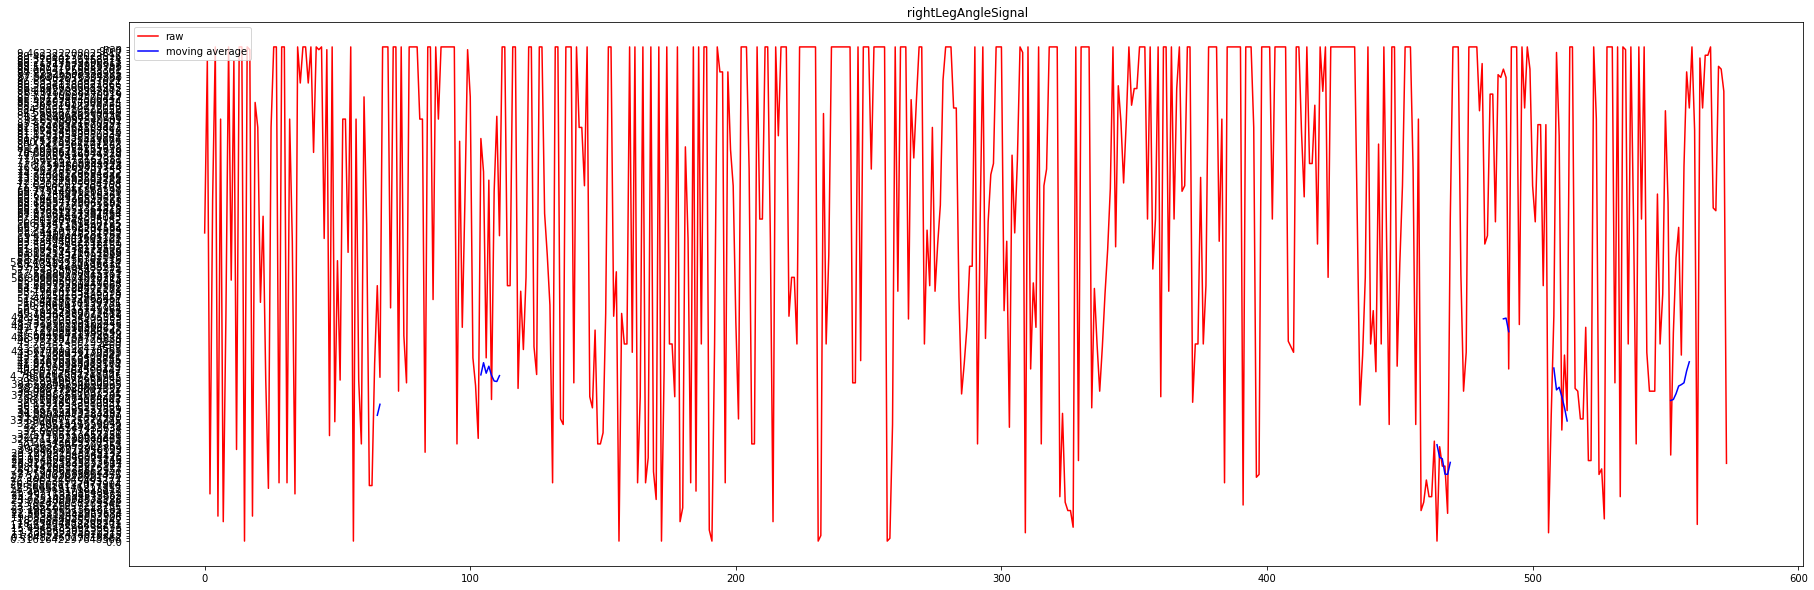

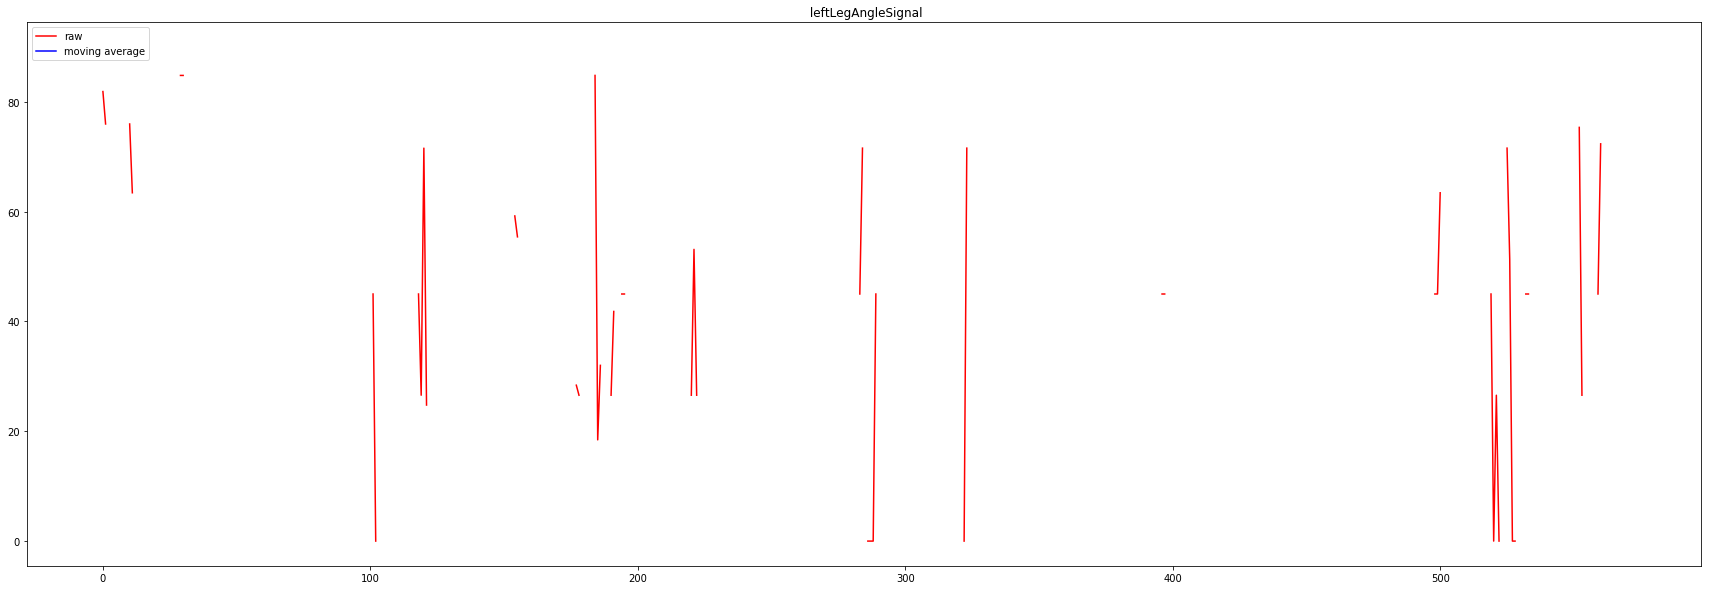

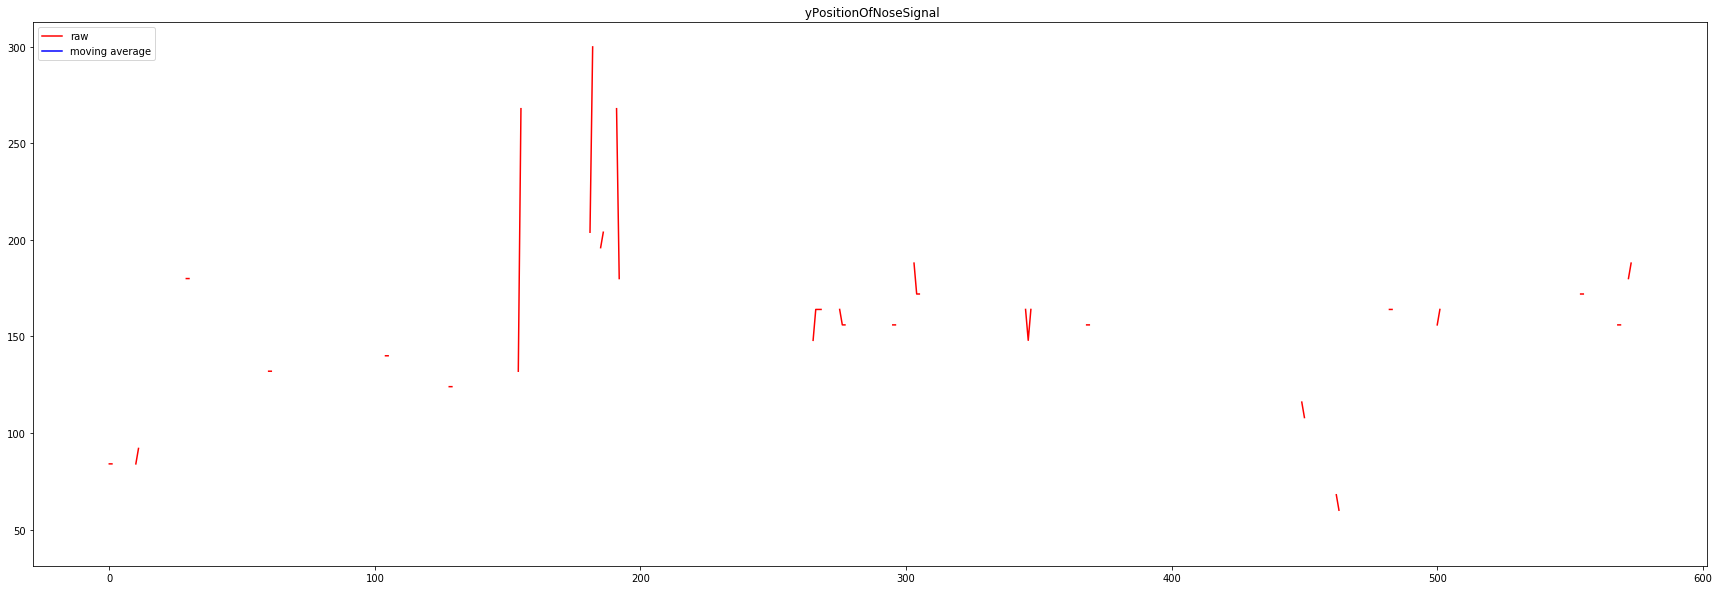

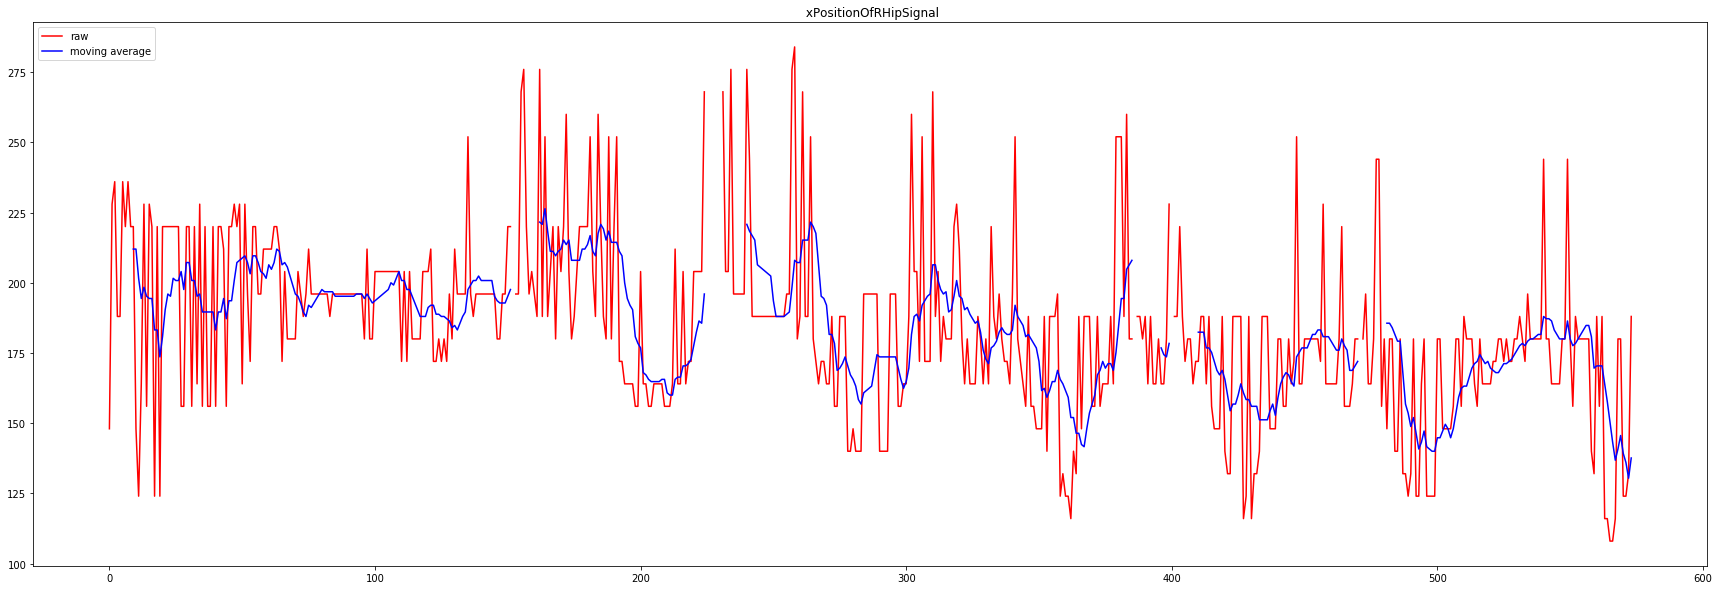

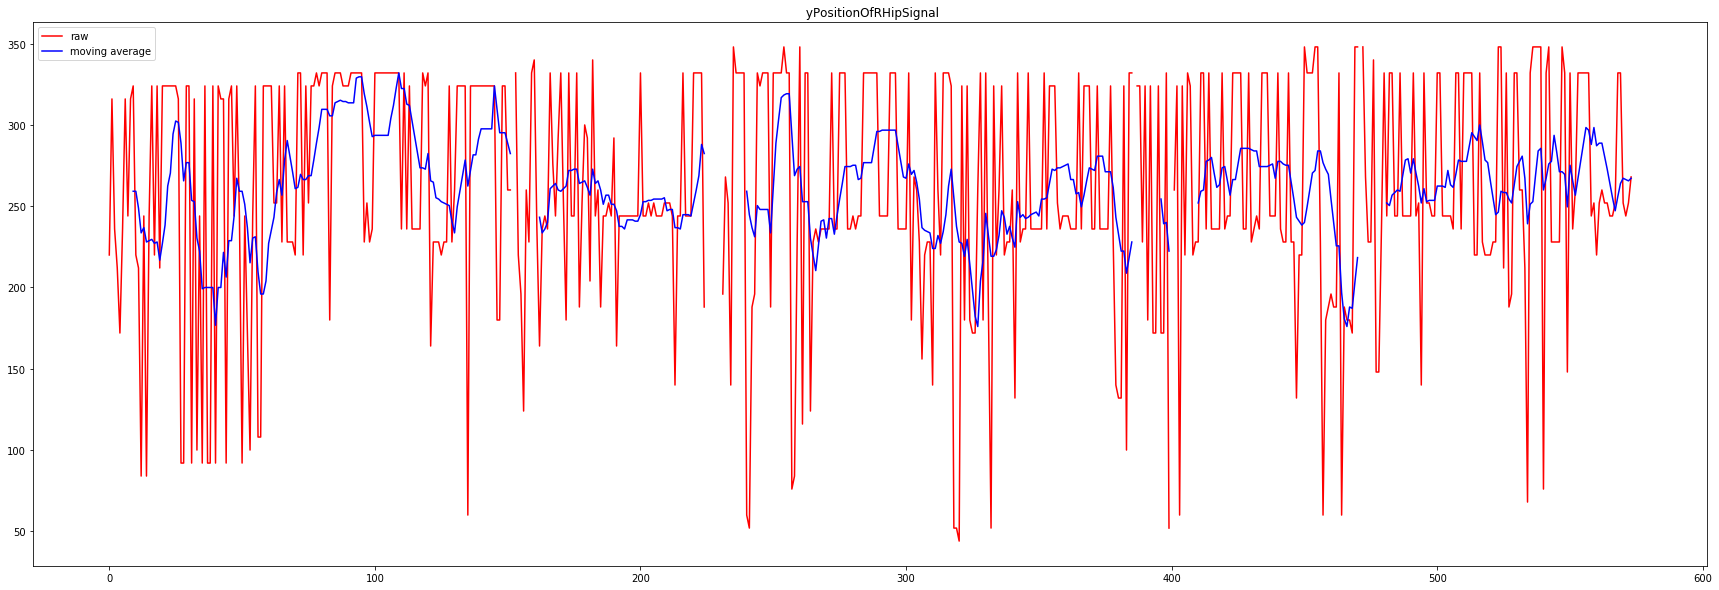

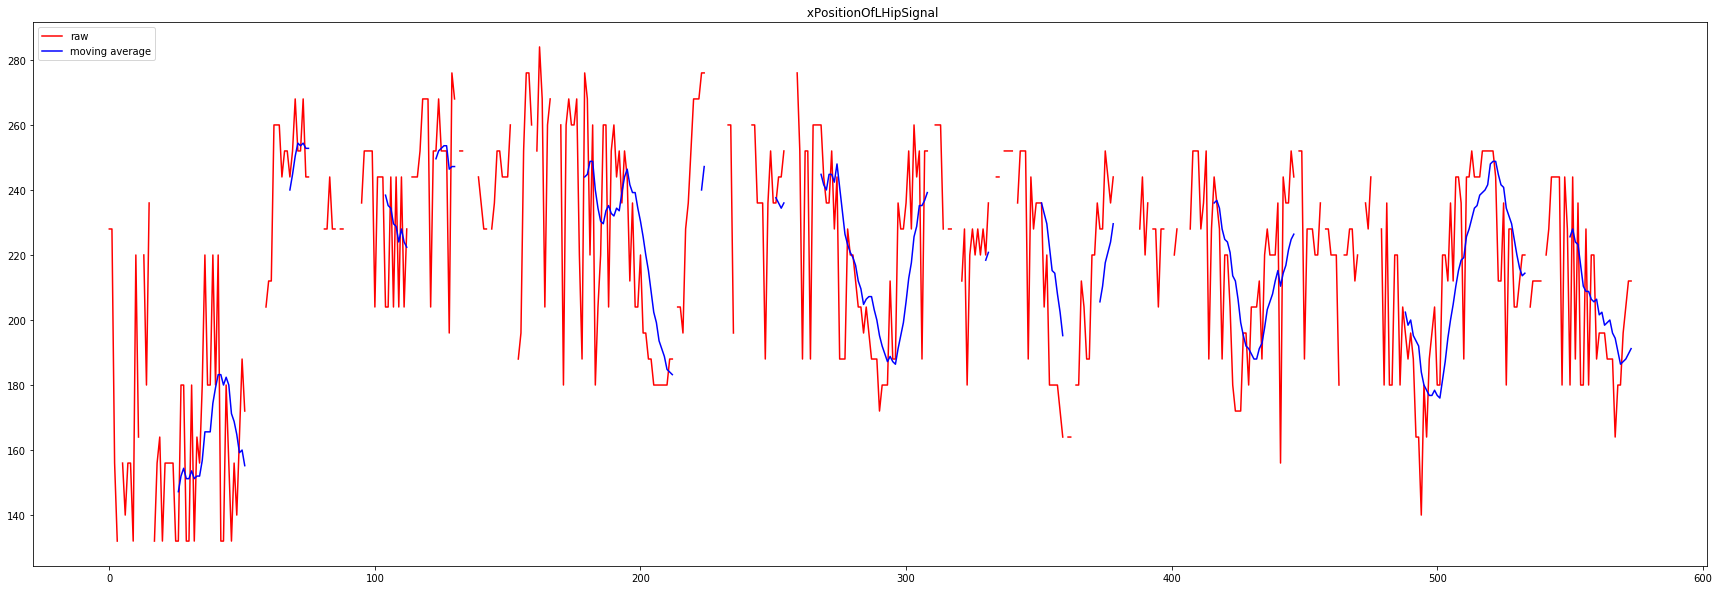

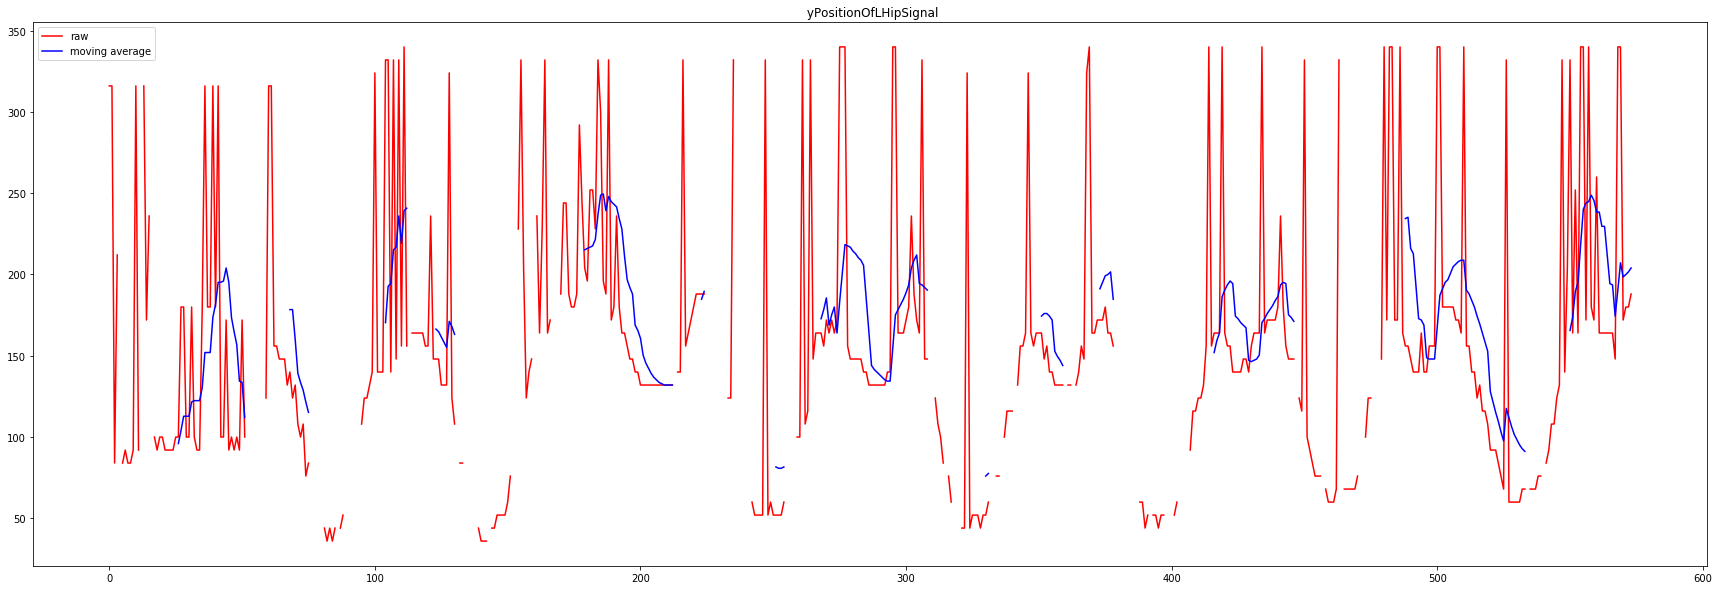

In [7]:
for column_name in df.columns[1:-1]: #iterate over all columns except the first one which is the "index" column
    
    particular_signal_df = df[column_name]
    
    particular_signal_df_rolling_average = particular_signal_df.rolling(window=10).mean()
    
    plt.figure() #create a new matplotlib chart
    plt.figure(figsize=(30,10))
    
    plt.title(column_name)
        
    plt.plot(particular_signal_df, label="raw", color="red")
    
    plt.plot(particular_signal_df_rolling_average, label="moving average", color="blue")
    
    plt.legend(loc='upper left')
    
    plt.savefig("/Users/sreeharirammohan/Desktop/Sit-to-stand test/iPhone-Signal-Analysis/"+column_name)

# Periodograms

In [8]:
from scipy.signal import periodogram, lombscargle

### Our signal is sparse and NOT sampled at a constant ∆t seconds so we cannot use a normal periodogram. The periodogram relies on the Discrete Fourier Transform which assumes that the data is continuous and that there are no gaps. To account for this, let's use the Lomb-Scargle periodogram

start of loop
 rightLegAngleSignal
end of loop
start of loop
 leftLegAngleSignal
end of loop
start of loop
 yPositionOfNoseSignal
end of loop
start of loop
 xPositionOfRHipSignal
end of loop
start of loop
 yPositionOfRHipSignal
end of loop
start of loop
 xPositionOfLHipSignal
end of loop
start of loop
 yPositionOfLHipSignal
end of loop
start of loop
 pgram
end of loop


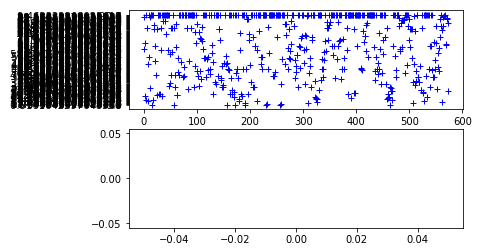

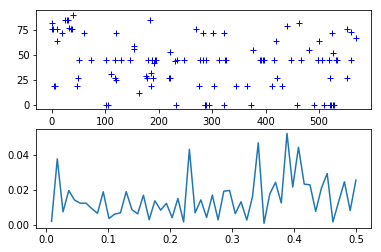

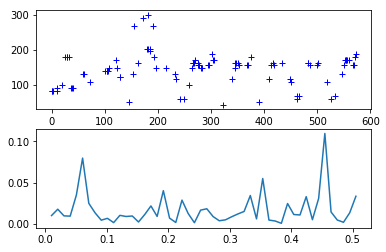

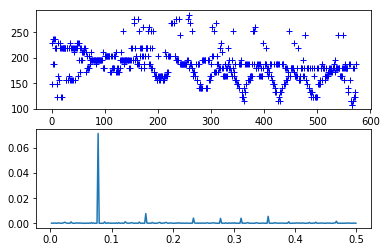

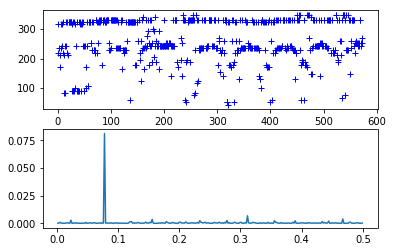

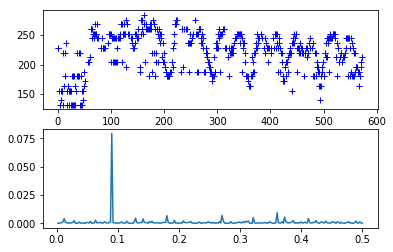

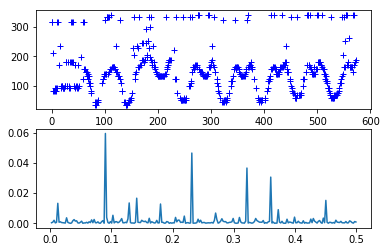

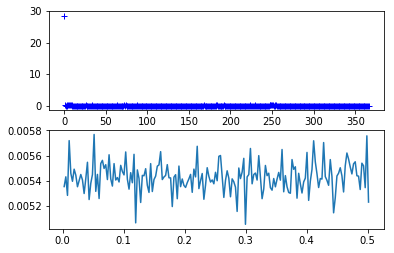

In [9]:
for column_name in df.columns[1:]:
    
    print("start of loop")
    df_to_periodify = df.iloc[:, [0, df.columns.get_loc(column_name)]].copy(deep=True)
    df_to_periodify.dropna(axis=0, inplace=True)
    
    x = df_to_periodify.iloc[:, 0]
    y = df_to_periodify.iloc[:, 1]

    #all periodograms are just brute forced, lets just use 10,000 possibles f's
    f = np.linspace(1, round(len(x)/2), round(len(x)/2))
    
    f_translated_for_plotting = f.copy()/len(x)    
                
    pgram = lombscargle(x, y, f, normalize=True)
    
    plt.figure()
    plt.title(column_name)
    
    print(column_name)
        
    plt.subplot(2, 1, 1)
    plt.plot(x, y, 'b+')

    plt.subplot(2, 1, 2)
    plt.plot(f_translated_for_plotting, pgram)
    print("end of loop")
    
    plt.savefig("/Users/sreeharirammohan/Desktop/Sit-to-stand test/iPhone-Signal-Analysis/" + "periodogram_of_" + column_name)


In [10]:
# Calculating a periodogram manually using FFT (without Scipy) to see if there is a comparison with the iOS periodogram

In [2]:
df = pd.read_csv("all-signals.csv", sep='\s*,\s*')
df.columns

/Users/sreeharirammohan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


FileNotFoundError: [Errno 2] No such file or directory: 'all-signals.csv'

In [12]:
rightLegAngle = df.iloc[:, 1]
rightLegAngle = rightLegAngle.replace([rightLegAngle[0]], np.nan)
rightLegAngle.dropna(axis=0, inplace=True)

In [13]:
rightLegAngle = rightLegAngle.apply(lambda x: float(x))

In [14]:
type(rightLegAngle.values[0])

numpy.float64

In [15]:
signal = np.array(rightLegAngle)

In [16]:
pgram = (2.0/float(signal.size)) * np.power(np.fft.fft(signal), 2)
indices = list(range(0, int(len(pgram)/2 + 1)))
pgram = pgram[indices]

/Users/sreeharirammohan/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


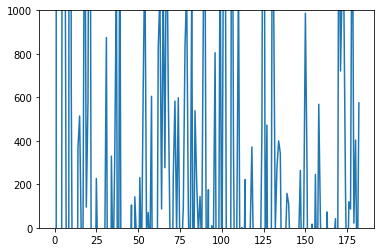

In [17]:
plt.plot(pgram)
plt.ylim(0,1000)
plt.savefig("pure-numpy-periodogram")

In [18]:
print(len(pgram))

183


In [19]:
pgram_df = df['pgram']

In [20]:
print(len(pgram_df))

574


In [21]:
pgram_df = pgram_df[0:int(len(pgram_df)/4 + 1)]

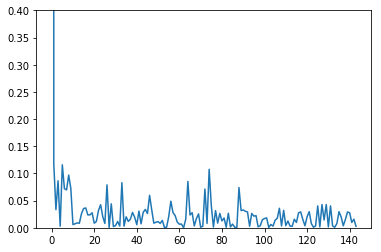

In [22]:
plt.ylim(0, 0.4)
plt.plot(pgram_df)
plt.savefig("iOS-periodogram")

In [23]:
print(len(pgram_df))

144


In [24]:
playground_df = pd.read_csv("2-playground_interpolation_and_pgram.csv")

In [31]:
playground_df.columns

Index(['pgram', ' linear-interpolation'], dtype='object')

In [32]:
playground_df.head()

,pgram,linear-interpolation
0,2.440876e+06,64.440035
1,2.877508e+03,89.215175
2,3.495834e+02,25.253163
3,1.515761e+03,69.145542
4,5.602360e+02,44.399683


In [26]:
pgram_playground = playground_df["pgram"]

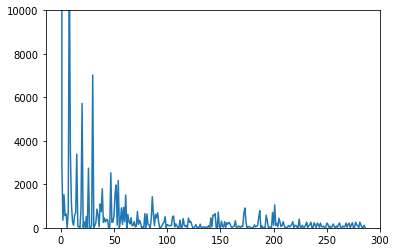

In [27]:
plt.ylim(0,10000)
plt.plot(pgram_playground[:int(len(pgram_playground)/2)])
plt.savefig("pgram_swift_accelerate")

In [28]:
linear_interpolated_signal = playground_df[" linear-interpolation"]
signal = np.array(linear_interpolated_signal.apply(lambda x: float(x)))

In [29]:
pgram_python = (2.0/float(signal.size)) * np.power(np.fft.fft(signal), 2)
indices = list(range(0, int(len(pgram_python)/2 + 1)))
pgram_python = pgram_python[indices]

/Users/sreeharirammohan/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


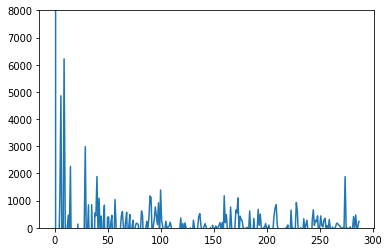

In [30]:
plt.ylim(0, 8000)
plt.plot(pgram_python)
plt.savefig("pgram_python")

In [171]:
def compute_periodogram(input_signal):
    
    signal = np.array(input_signal) #np.array(input_signal.apply(lambda x: float(x)))
    
    pgram_python = (2.0/float(signal.size)) * np.power(np.fft.fft(signal), 2)
    indices = list(range(0, int(len(pgram_python)/2 + 1)))
    pgram_python = pgram_python[indices]
    return np.array(pgram_python.real)

In [172]:
df = pd.read_csv("all_signals.csv", sep='\s*,\s*', encoding='ascii', engine='python', skiprows=[1])

In [173]:
df.head()

,Index,rightLegAngleSignal,leftLegAngleSignal,yPositionOfNoseSignal,xPositionOfRHipSignal,yPositionOfRHipSignal,xPositionOfLHipSignal,yPositionOfLHipSignal,pgram_rightLegAngleSignal,pgram_leftLegAngleSignal,...,pgram_xPositionOfLHipSignal,pgram_yPositionOfLhipSignal,pgram_all,rightLegAngleSignal_interpolated,leftLegAngleSignal_interpolated,yPositionOfNoseSignal_interpolated,xPositionOfRHipSignal_interpolated,yPositionOfRHipSignal_interpolated,xPositionOfLHipSignal_interpolated,yPositionOfLHipSignal_interpolated
0,1,58.671307,NaN,NaN,228.0,316.0,188.0,124.0,215.813400,6002.708496,...,15097.680664,4031.844238,1125.312500,58.671307,70.641243,140.0,228.0,316.0,188.0,124.0
1,2,68.198593,53.130104,124.0,228.0,316.0,220.0,316.0,213.747116,2977.767578,...,19613.613281,37350.089844,1325.328735,68.198593,53.130104,124.0,228.0,316.0,220.0,316.0
2,3,53.130104,38.659809,188.0,228.0,316.0,156.0,132.0,405.646454,747.886169,...,10101.114258,56.535168,1111.789917,53.130104,38.659809,188.0,228.0,316.0,156.0,132.0
3,4,0.784825,31.159304,124.0,236.0,252.0,236.0,236.0,377.912415,9.489709,...,288.811157,341.683746,1115.944092,0.784825,31.159304,124.0,236.0,252.0,236.0,236.0
4,5,66.161263,86.877869,156.0,196.0,228.0,188.0,236.0,44.663975,38.840706,...,1621.613892,9.425264,1157.039062,66.161263,86.877869,156.0,196.0,228.0,188.0,236.0


In [174]:
print(df.columns.to_list())

['Index', 'rightLegAngleSignal', 'leftLegAngleSignal', 'yPositionOfNoseSignal', 'xPositionOfRHipSignal', 'yPositionOfRHipSignal', 'xPositionOfLHipSignal', 'yPositionOfLHipSignal', 'pgram_rightLegAngleSignal', 'pgram_leftLegAngleSignal', 'pgram_yPositionOfNoseSignal', 'pgram_xPositionOfRHipSignal', 'pgram_yPositionOfRhipSignal', 'pgram_xPositionOfLHipSignal', 'pgram_yPositionOfLhipSignal', 'pgram_all', 'rightLegAngleSignal_interpolated', 'leftLegAngleSignal_interpolated', 'yPositionOfNoseSignal_interpolated', 'xPositionOfRHipSignal_interpolated', 'yPositionOfRHipSignal_interpolated', 'xPositionOfLHipSignal_interpolated', 'yPositionOfLHipSignal_interpolated']


In [175]:
df.columns = map(lambda x: x.strip(), list(df.columns)) #remove preceding " " and trailing " " from column names

In [176]:
df.columns.values

array(['Index', 'rightLegAngleSignal', 'leftLegAngleSignal',
       'yPositionOfNoseSignal', 'xPositionOfRHipSignal',
       'yPositionOfRHipSignal', 'xPositionOfLHipSignal',
       'yPositionOfLHipSignal', 'pgram_rightLegAngleSignal',
       'pgram_leftLegAngleSignal', 'pgram_yPositionOfNoseSignal',
       'pgram_xPositionOfRHipSignal', 'pgram_yPositionOfRhipSignal',
       'pgram_xPositionOfLHipSignal', 'pgram_yPositionOfLhipSignal',
       'pgram_all', 'rightLegAngleSignal_interpolated',
       'leftLegAngleSignal_interpolated',
       'yPositionOfNoseSignal_interpolated',
       'xPositionOfRHipSignal_interpolated',
       'yPositionOfRHipSignal_interpolated',
       'xPositionOfLHipSignal_interpolated',
       'yPositionOfLHipSignal_interpolated'], dtype=object)

['pgram_rightLegAngleSignal' 'pgram_leftLegAngleSignal'
 'pgram_yPositionOfNoseSignal' 'pgram_xPositionOfRHipSignal'
 'pgram_yPositionOfRHipSignal' 'pgram_xPositionOfLHipSignal'
 'pgram_yPositionOfLHipSignal' 'pgram_all']


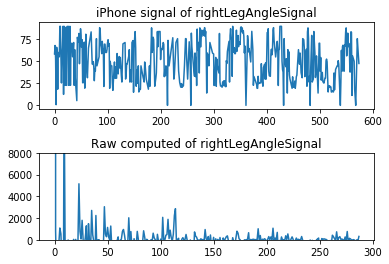

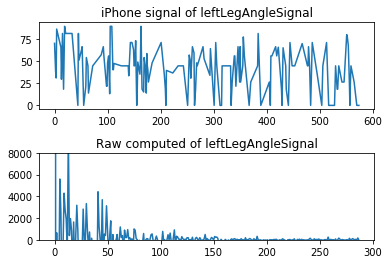

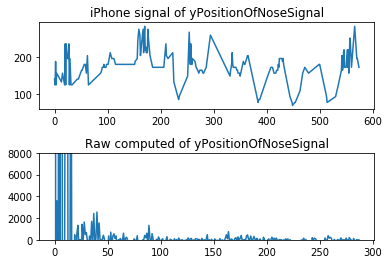

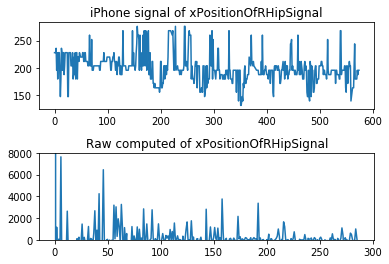

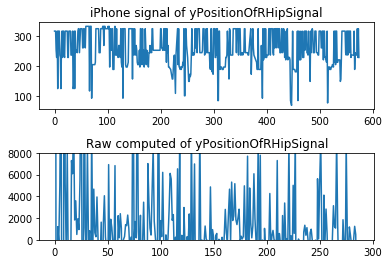

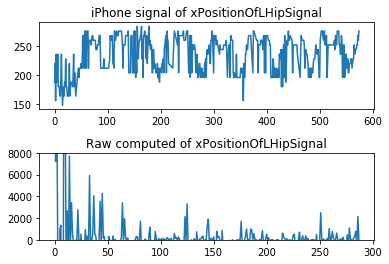

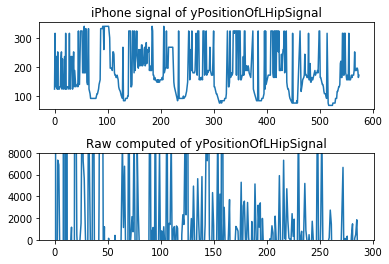

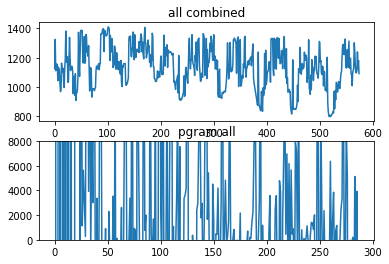

In [189]:

pgrams_to_plot = df.columns.values[8:16]

print(pgrams_to_plot)

#fix bad key
pgrams_to_plot[4] = "pgram_yPositionOfRHipSignal"
pgrams_to_plot[6] = "pgram_yPositionOfLHipSignal"


for i in range(0, len(pgrams_to_plot)):
    
    #strip second half of _
    
    pgram_name = pgrams_to_plot[i]
    
    stripped_raw_name = pgram_name.split("_")[1].strip()
    
    if (stripped_raw_name == "all"):
        pgram_data = np.array(df["pgram_all"])
        
        fig = plt.figure()
        
        graph_1 = plt.subplot(2, 1, 1)
        
        graph_1.set_title("all combined")
        
        graph_1.plot(pgram_data)
        
        graph_2 = plt.subplot(2, 1, 2)
        
        graph_2.set_title("pgram all")
        
        computed_periodogram = compute_periodogram(pgram_data)
        graph_2.plot(computed_periodogram) 
        
        graph_2.set_ylim(0, 8000)
        
        fig.savefig("iPhone-Signal-Analysis/2-17-19/" + "combined signal" + ".png")

        
    else:
        pgram_data = np.array(df[stripped_raw_name + "_interpolated"])

        fig = plt.figure()

        #add spacing between verticle plots to give room for plot title
        fig.subplots_adjust(hspace=.5)

        graph_1 = plt.subplot(2, 1, 1)
        graph_1.set_title("iPhone signal of {}".format(stripped_raw_name))

        graph_1.plot(pgram_data)

        graph_2 = plt.subplot(2, 1, 2)
        graph_2.set_title("Raw computed of {}".format(stripped_raw_name))

        computed_periodogram = compute_periodogram(df[stripped_raw_name + "_interpolated"])
        graph_2.plot(computed_periodogram)  
        graph_2.set_ylim(0, 8000)
        
        fig.savefig("iPhone-Signal-Analysis/2-17-19/" + stripped_raw_name + ".png")
            
